In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

In [6]:
#def load_dataset():
#    train_dataset = h5py.File('datasets/train_catvnoncat.h5', 'r')

[[[15 15  5]
  [17 17  6]
  [17 17  7]
  ..., 
  [ 1  1  0]
  [ 1  1  1]
  [ 1  1  1]]

 [[16 16  5]
  [18 17  6]
  [19 18  9]
  ..., 
  [ 1  1  0]
  [ 1  1  1]
  [ 1  1  1]]

 [[16 16  6]
  [18 17  8]
  [21 19  9]
  ..., 
  [ 1  1  1]
  [ 1  1  0]
  [ 2  2  1]]

 ..., 
 [[16 21 18]
  [22 27 24]
  [29 35 33]
  ..., 
  [ 0  1  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[16 20 16]
  [22 29 25]
  [29 35 32]
  ..., 
  [ 1  3  1]
  [ 0  1  0]
  [ 0  0  0]]

 [[14 19 14]
  [21 29 25]
  [31 37 33]
  ..., 
  [ 2  4  2]
  [ 1  2  1]
  [ 0  0  0]]]


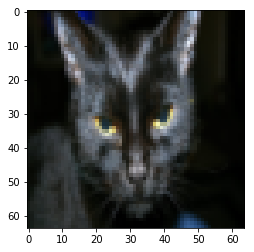

In [8]:
#train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
#train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
#train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
#
#test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
#test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
#test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

#classes = np.array(test_dataset["list_classes"][:]) # the list of classes
# 加载数据    
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset() 
print(train_set_x_orig[25])
plt.imshow(train_set_x_orig[25])
plt.show()
#print(train_set_y[0,25])
#print("y=" + str(train_set_y[:,0]) + ", it's a " + classes[np.squeeze(train_set_y[:,0])].decode("utf-8") + "' picture")

In [15]:
m_train = train_set_y.shape[1] #训练集里图片的数量
#print(train_set_y)
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
print('训练集数量_train：' + str(m_train))
print('测试集数量m_test：%d'%m_test)
print('图片宽、高num_px：%d'%num_px)
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))    

训练集数量_train：209
测试集数量m_test：50
图片宽、高num_px：64
每张图片的大小 : (64, 64, 3)
训练集_图片的维数 : (209, 64, 64, 3)
训练集_标签的维数 : (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)


In [7]:
#降维（目的）
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T # 参数-1自动计算有多少列
#print(train_set_x_flatten)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
#print(test_set_x_flatten)
print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y.shape))

训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)


In [8]:
#标准化数据（使得梯度下降法能够更直接更快速地找到最小值）
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [9]:
#构建sigmoid函数
def sigmoid(z):
    """
    """
    s = 1 / (1 + np.exp(-z))
    return s

In [10]:
#测试sigmoid函数
print('================================测试========================================')
print('sigmoid(0) = ' + str(sigmoid(0)))
print('sigmoid(9.2) = ' + str(sigmoid(9.2)))


================================测试========================================
sigmoid(0) = 0.5
sigmoid(9.2) = 0.999898970806


In [11]:
#初始化参数w和b
def initialize_with_zeros(dim):
    """
    """
    w = np.zeros(shape = (dim,1))#为什么用0初始化，随机初始化会怎么样???????没有隐藏层相当于逻辑回归，逻辑回归没有隐藏层，导数取决于 x 
    b = 0
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b,int))
    
    return (w, b)

In [12]:
#向前向后传播过程

def propagate(w,b,X,Y):
    
    m = X.shape[1]# 降维及标准化之后X列数即样本个数
    #print('m = %d'%m)
    #正向
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    #反向
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    #确保数据正确
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())#？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
    
    #保存w和b
    grads = {
        
        "dw" : dw,
        'db' : db
    }
    
    return (grads, cost)

In [13]:
#测试传播过程
print('=========================================测试propagate=====================================')
w, b, X, Y =np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]),np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print('dw = '+ str(grads['dw']))
print('db = '+ str(grads['db']))
print('cost = ' + str(cost))

=========================================测试propagate=====================================
dw = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.00006477319


In [14]:
#优化成本函数
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost= False):
    """
    """
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #记录成本
        if i % 100 == 0:
            costs.append(cost)
        #打印
        if (print_cost) and (i % 100 == 0):
            print('迭代次数：%d, 误差值：%f'%(i, cost))
        
    params = {
        'w' : w,
        'b' : b
    }
    grads = {
        'dw' : dw,
        'db' : db
    }
    
    return (params, grads, costs)

In [15]:
print("=================================测试optimize================================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1, 2], [3, 4]]), np.array([[0, 1]])
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost= False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

=================================测试optimize================================
w = [[ 0.552169  ]
 [ 0.65584388]]
b = 1.55183744043
dw = [[ 0.48726018]
 [ 1.46652736]]
db = 0.48963358917


In [16]:
#预测
def predict(w, b, X):
    """
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1, m)) # 创建（1，m）维数组存放预测结果
    w = w.reshape(X.shape[0], 1)
    
    #预测猫在图片中出现的概率
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        #讲概率a[0,i]转换为实际预测概率p[0, i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0 #这种格式????????????????????????
        
    #使用断言
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [17]:
#测试predict
print('=================================测试predict==============================')
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1, 2], [3, 4]]), np.array([[1, 0]])
print('predictions = ' + str(predict(w, b, X)))

=================================测试predict==============================
predictions = [[ 1.  1.]]


In [18]:
#整合
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    """
    # 初始化参数 w，b
    w, b = initialize_with_zeros(X_train.shape[0])
    # 优化
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #从字典‘参数’中检索w和b，用训练好的参数进行预测
    w, b = parameters['w'], parameters['b']
    
    #预测测试集例子
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    #打印预测准确性
    print('训练集准确性：', format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100), '%')
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")
    
    d = {
        "costs" : costs,
        "Y_prediction_test" : Y_prediction_test,
        "Y_prediciton_train" : Y_prediction_train,
        "w" : w,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations" : num_iterations 
    }
    
    return d


In [19]:
#测试model
print('=============================测试model====================================')
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

=============================测试model====================================
迭代次数：0, 误差值：0.693147
迭代次数：100, 误差值：0.584508
迭代次数：200, 误差值：0.466949
迭代次数：300, 误差值：0.376007
迭代次数：400, 误差值：0.331463
迭代次数：500, 误差值：0.303273
迭代次数：600, 误差值：0.279880
迭代次数：700, 误差值：0.260042
迭代次数：800, 误差值：0.242941
迭代次数：900, 误差值：0.228004
迭代次数：1000, 误差值：0.214820
迭代次数：1100, 误差值：0.203078
迭代次数：1200, 误差值：0.192544
迭代次数：1300, 误差值：0.183033
迭代次数：1400, 误差值：0.174399
迭代次数：1500, 误差值：0.166521
迭代次数：1600, 误差值：0.159305
迭代次数：1700, 误差值：0.152667
迭代次数：1800, 误差值：0.146542
迭代次数：1900, 误差值：0.140872
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %


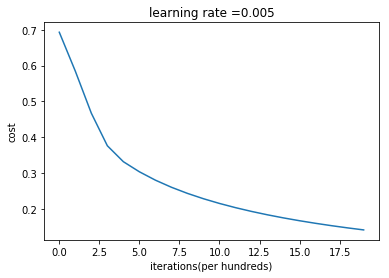

In [20]:
#绘图
costs = np.squeeze(d['costs'])#为什么可有可无
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title('learning rate =' + str(d['learning_rate']))
plt.show()

learning_rate is: 0.01
训练集准确性： 99.52153110047847 %
测试集准确性： 68.0 %

--------------------------------------------------------------

learning_rate is: 0.001
训练集准确性： 88.99521531100478 %
测试集准确性： 64.0 %

--------------------------------------------------------------

learning_rate is: 0.0001
训练集准确性： 68.42105263157895 %
测试集准确性： 36.0 %

--------------------------------------------------------------



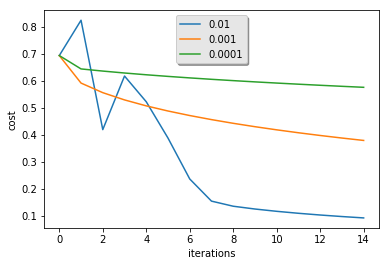

In [21]:
#选择学习率

learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print('learning_rate is: ' + str(i))
    models[str(i)] = model(train_set_x, train_set_y,test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost =False)
    print('\n'+'--------------------------------------------------------------'+ '\n')
    
for i in learning_rates:
        plt.plot(np.squeeze(models[str(i)]['costs']), label = str(models[str(i)]['learning_rate']))
        
plt.ylabel('cost')
plt.xlabel('iterations')
    
legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()